In [1]:
# Domínio
# Aparência: sol, nublado, chuva
# Temperatura: -130~130 F
# Umidade: 0~100
# Jogar: sim/nao

# Tratar valores NaNs

In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [3]:
# Importando os dados
dataset = pd.read_csv('tempo.csv', sep=';')

In [4]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
# Explorando dados categóricos
print(dataset.groupby(['Aparencia']).size())

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64


In [6]:
# Explorando dados categóricos
print(dataset.groupby(['Vento']).size())

Vento
FALSO         7
VERDADEIRO    6
dtype: int64


In [7]:
# Explorando dados categóricos
print(dataset.groupby(['Jogar']).size())

Jogar
nao    5
sim    9
dtype: int64


<AxesSubplot:xlabel='Aparencia'>

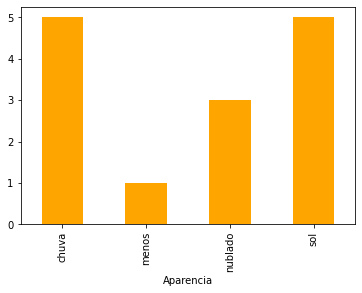

In [8]:
# Explorando dados categóricos em gráficos
dataset.groupby(['Aparencia']).size().plot.bar(color='orange')

<AxesSubplot:xlabel='Vento'>

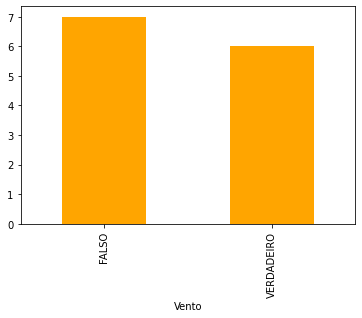

In [9]:
dataset.groupby(['Vento']).size().plot.bar(color='orange')

<AxesSubplot:xlabel='Jogar'>

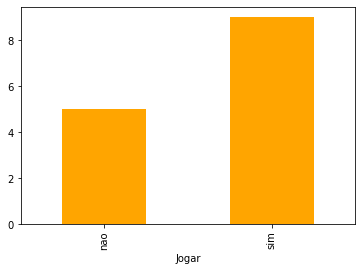

In [10]:
dataset.groupby(['Jogar']).size().plot.bar(color='orange')

In [11]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [12]:
# Explorar colunas numéricas
# Temperatura
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [13]:
# Explorar colunas numéricas
# Umidade
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Temperatura')

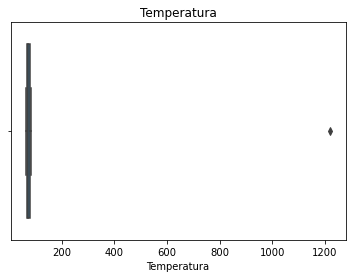

In [14]:
# Visualizar os dados numéricos através de um bloxplot
srn.boxplot(x=dataset['Temperatura']).set_title('Temperatura')

[Text(0.5, 1.0, 'Temperatura')]

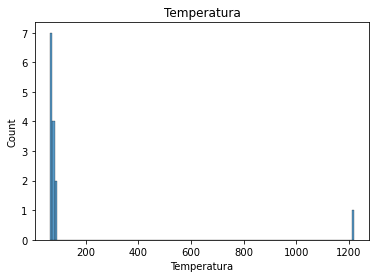

In [15]:
# Visualizar o dados através de um histograma - Depracated
srn.histplot(dataset['Temperatura']).set(title='Temperatura')

Text(0.5, 1.0, 'Umidade')

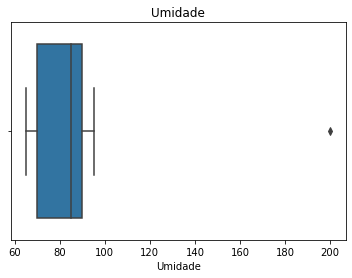

In [16]:
# Visualizar os dados numéricos através de um bloxplot
srn.boxplot(x=dataset['Umidade']).set_title('Umidade')

[Text(0.5, 1.0, 'Umidade')]

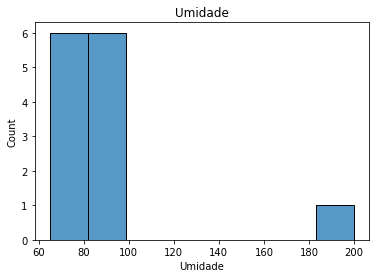

In [17]:
# Visualizar o dados através de um histograma - Depracated
srn.histplot(dataset['Umidade']).set(title='Umidade')

In [18]:
# Tratando valores NaN
# Contamos valor NaN
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [19]:
# Umidade
# Substituindo NaN pela mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [20]:
# Substituir NaN pelo mediana
dataset['Umidade'].fillna(mediana, inplace=True)

In [21]:
# Verificando se os NaN ainda existem
dataset['Umidade'].isnull().sum()

0

In [22]:
# Vento
# Substituir NaN pelo valor da Moda
dataset.groupby(['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [23]:
# Preenche NaNs com FALSO (Moda)
dataset['Vento'].fillna('FALSO', inplace=True)

In [24]:
# Verificando se os NaN ainda existem
dataset['Umidade'].isnull().sum()

0

In [25]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [26]:
# Verificando valores fora de domínio
dataset.loc[~dataset['Aparencia'].isin(['sol', 'nublado', 'chuva']), 'Aparencia']

6    menos
Name: Aparencia, dtype: object

In [27]:
# Descobrindo Moda de Aparência
dataset['Aparencia'].mode()[0]

'chuva'

In [28]:
# Substituindo valores fora do domínio
# Usaremos Chuva (Moda)
dataset.loc[~dataset['Aparencia'].isin(['sol', 'nublado', 'chuva']), 'Aparencia'] = dataset['Aparencia'].mode()[0]

In [29]:
aparencia = dataset.groupby(['Aparencia']).size()
print(aparencia)

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64


In [30]:
# Identificando quais valores estão fora do domínio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [31]:
# Calcular mediana para atribuir a tempratura fora do domínio
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [32]:
# Substituindo os valores fora do domínio pela mediana
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130), 'Temperatura'] = mediana

In [33]:
# Identificando quais valores estão fora do domínio
dataset.loc[(dataset['Temperatura'] < -130) | (dataset['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [34]:
# Identificando quais valores estão fora do domínio
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [35]:
# Calcular mediana para atribuir a tempratura fora do domínio
mediana = sts.median(dataset['Umidade'])
mediana

85.25

In [36]:
# Substituindo os valores fora do domínio pela mediana
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100), 'Umidade'] = mediana

In [37]:
# Identificando quais valores estão fora do domínio
dataset.loc[(dataset['Umidade'] < 0) | (dataset['Umidade'] > 100 )]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [38]:
dataset.head(14)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,chuva,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [39]:
dataset.shape

(14, 5)